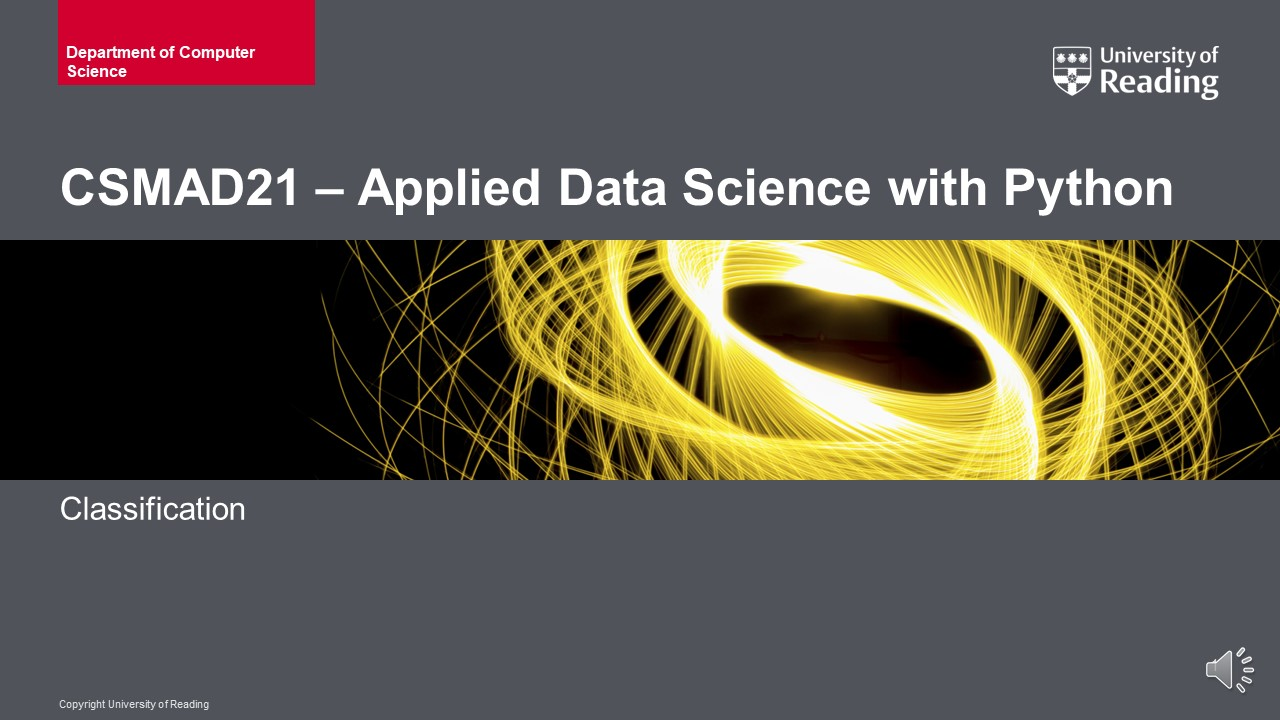

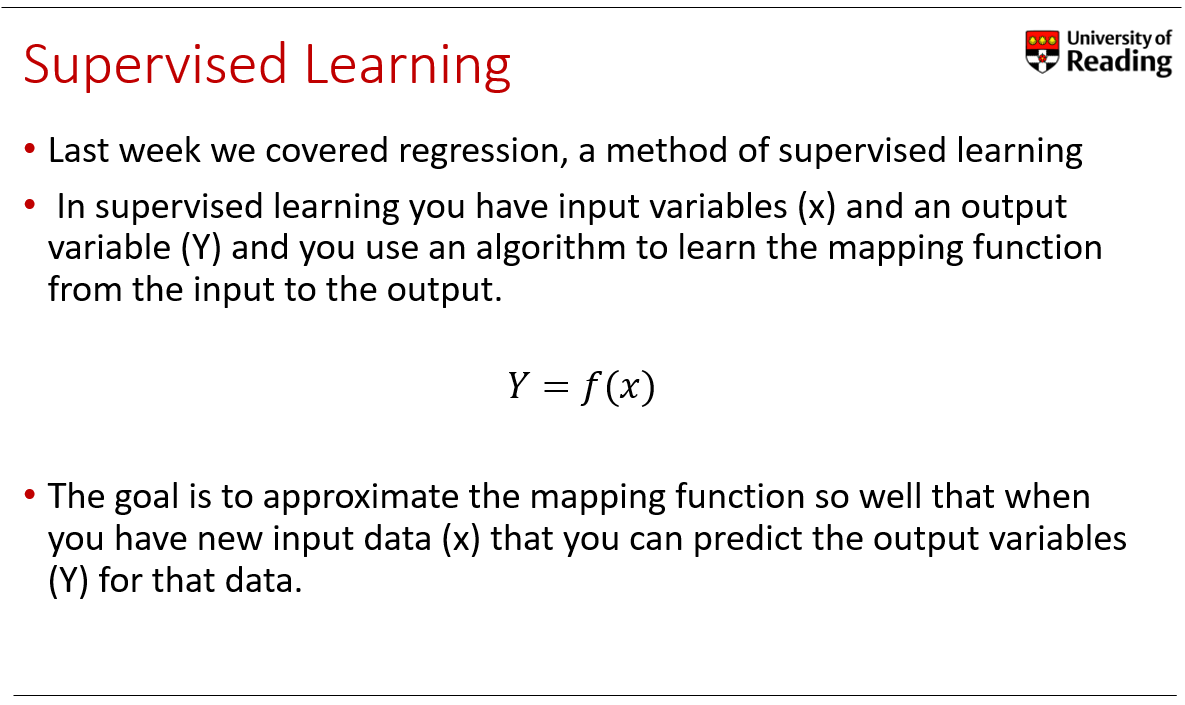

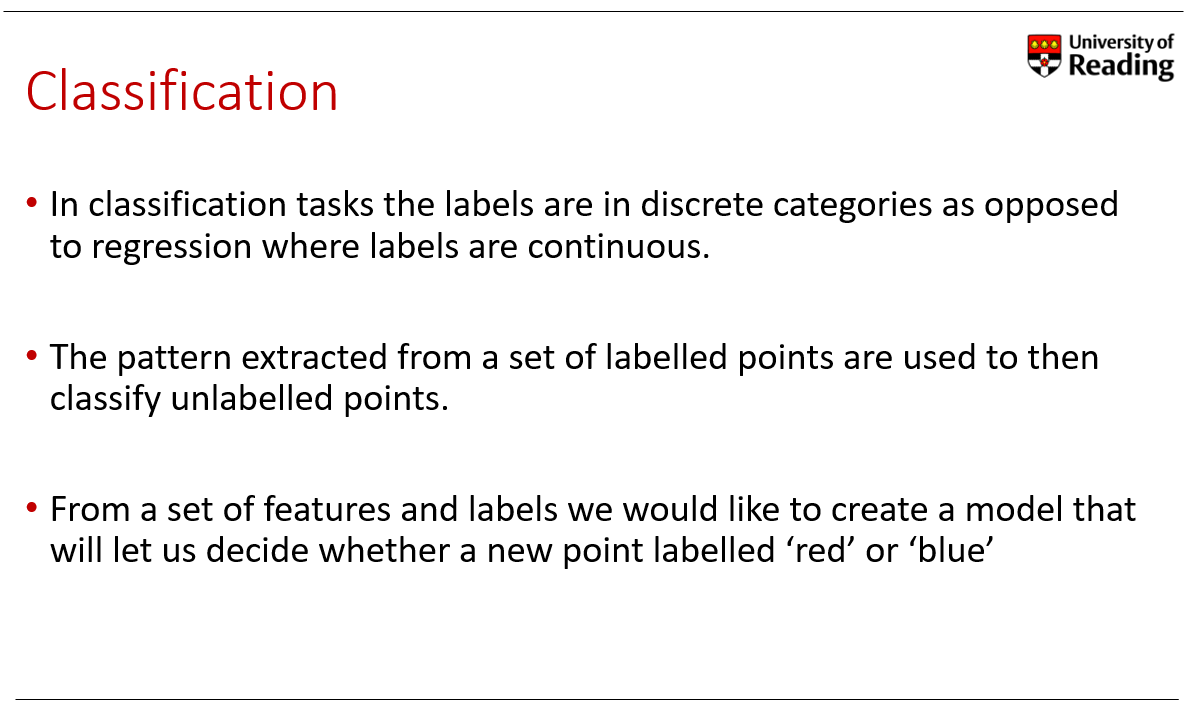

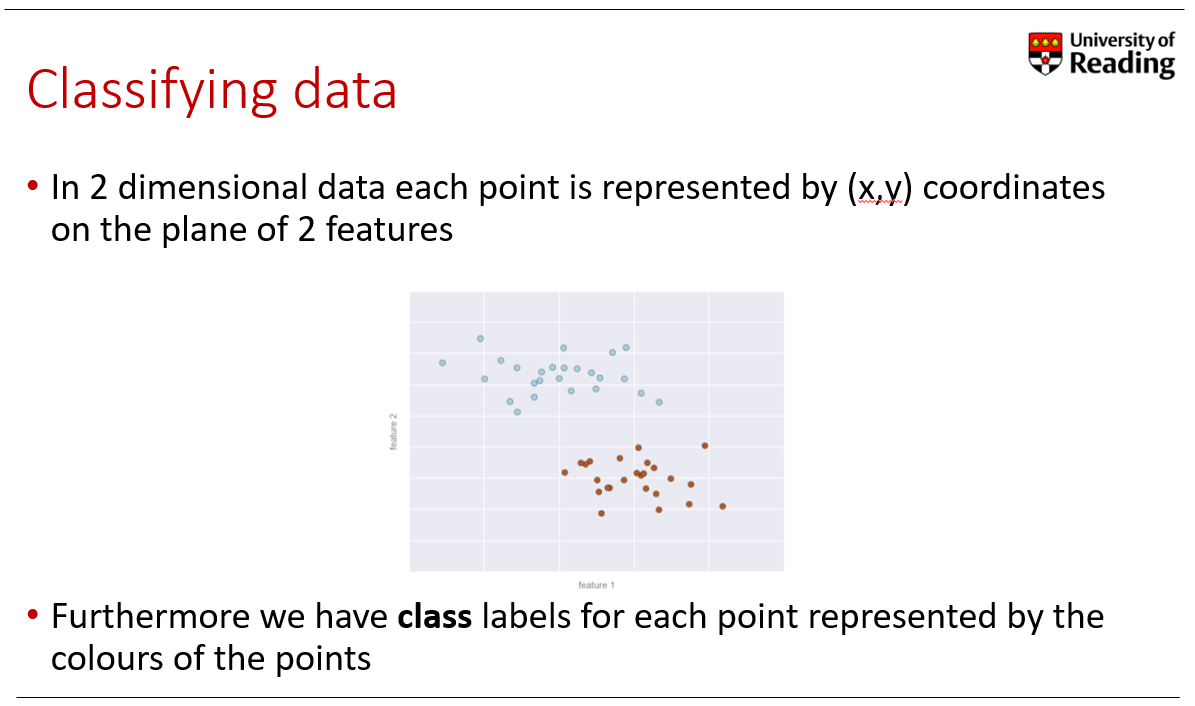

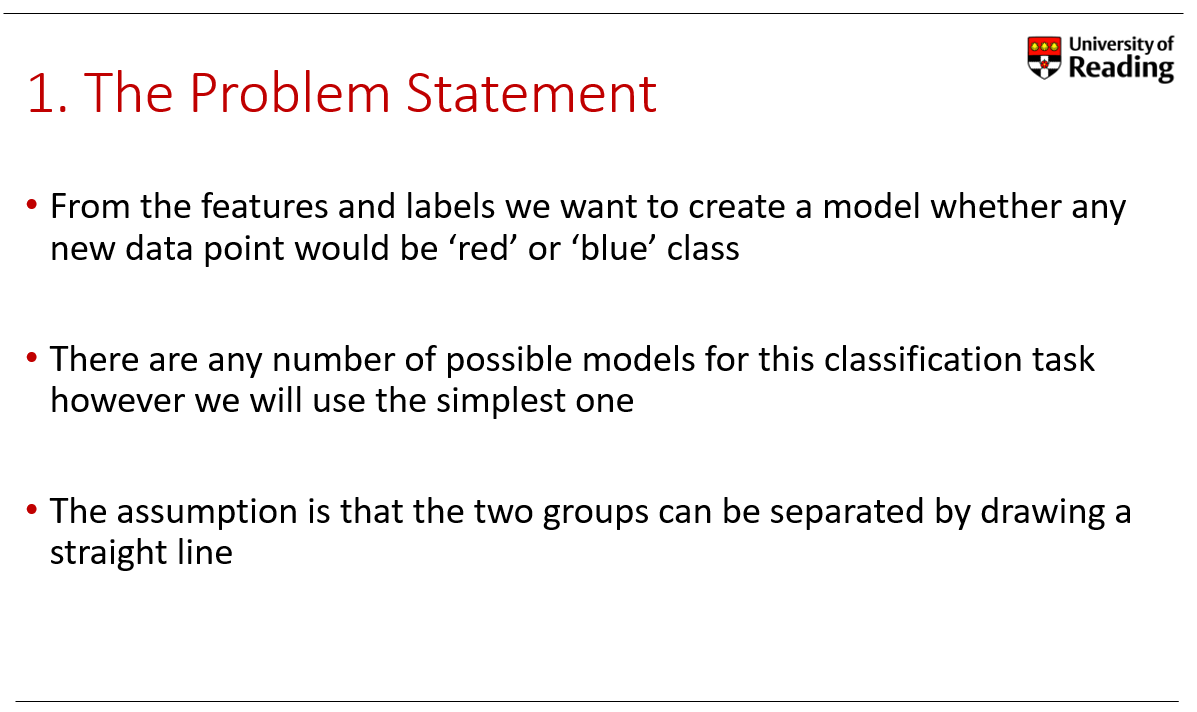

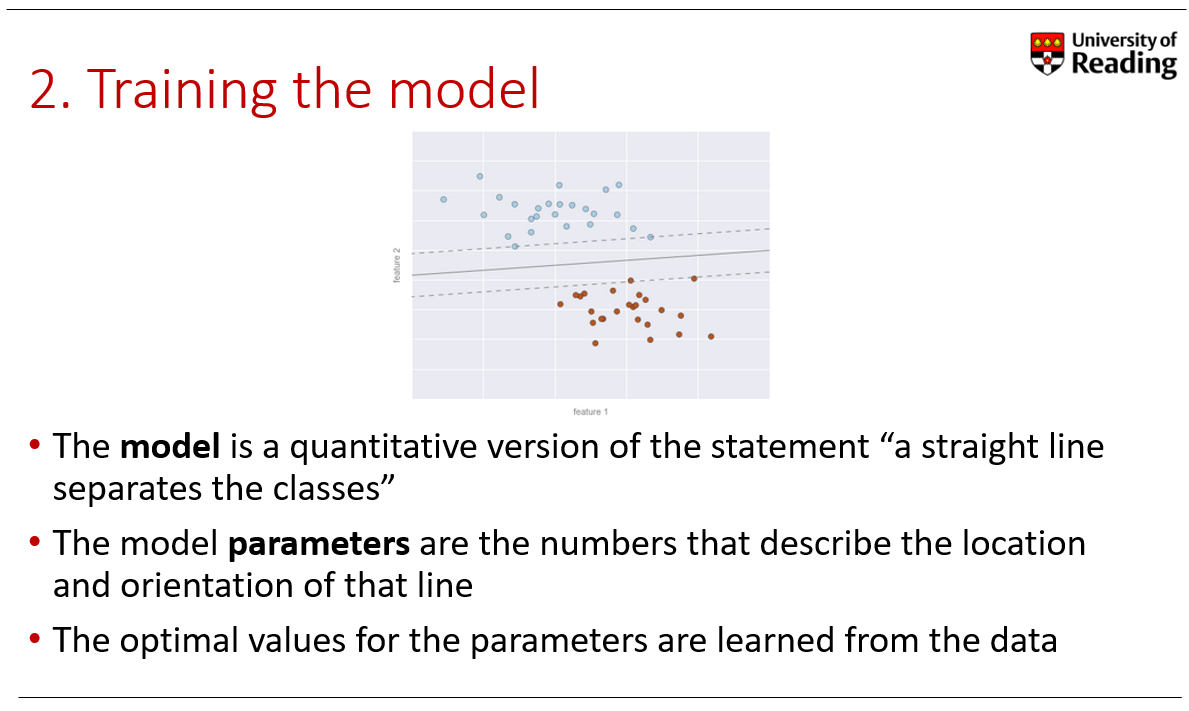

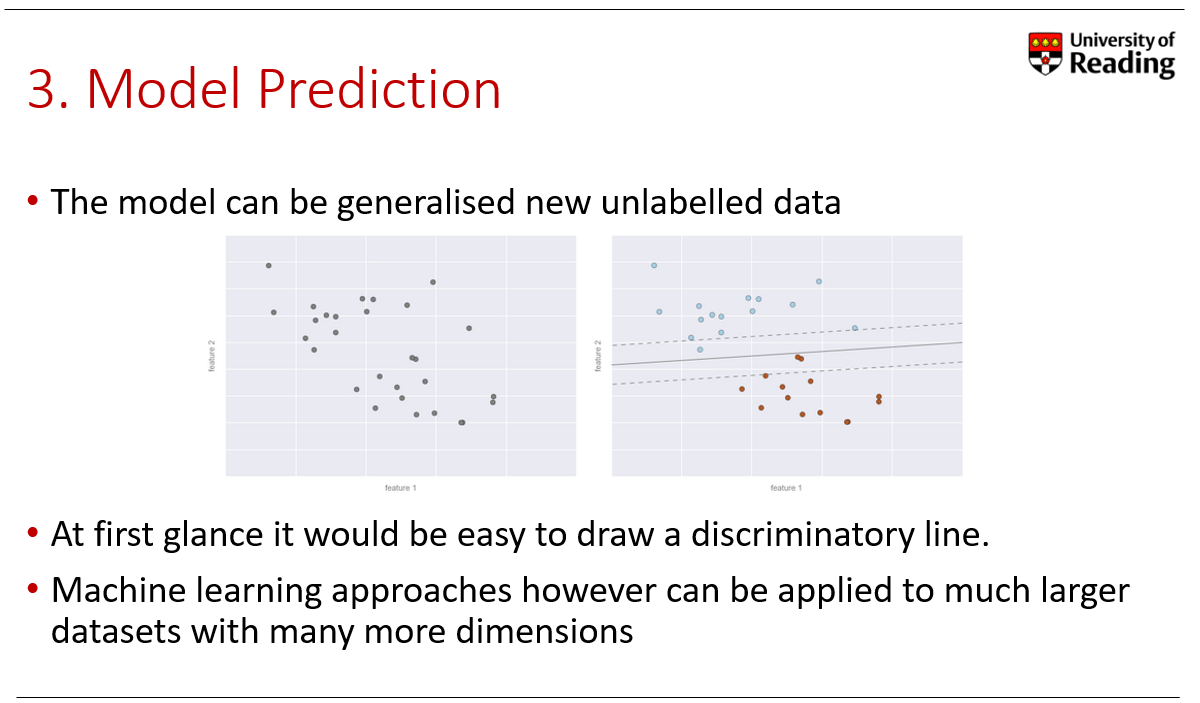

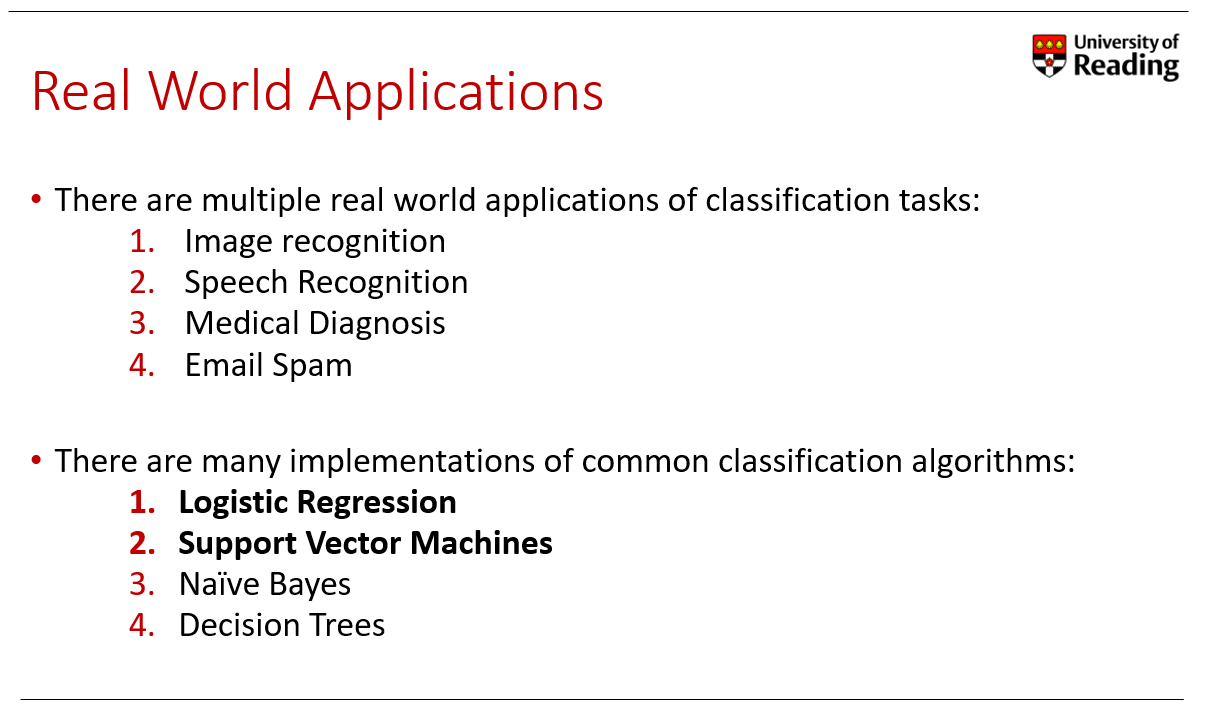

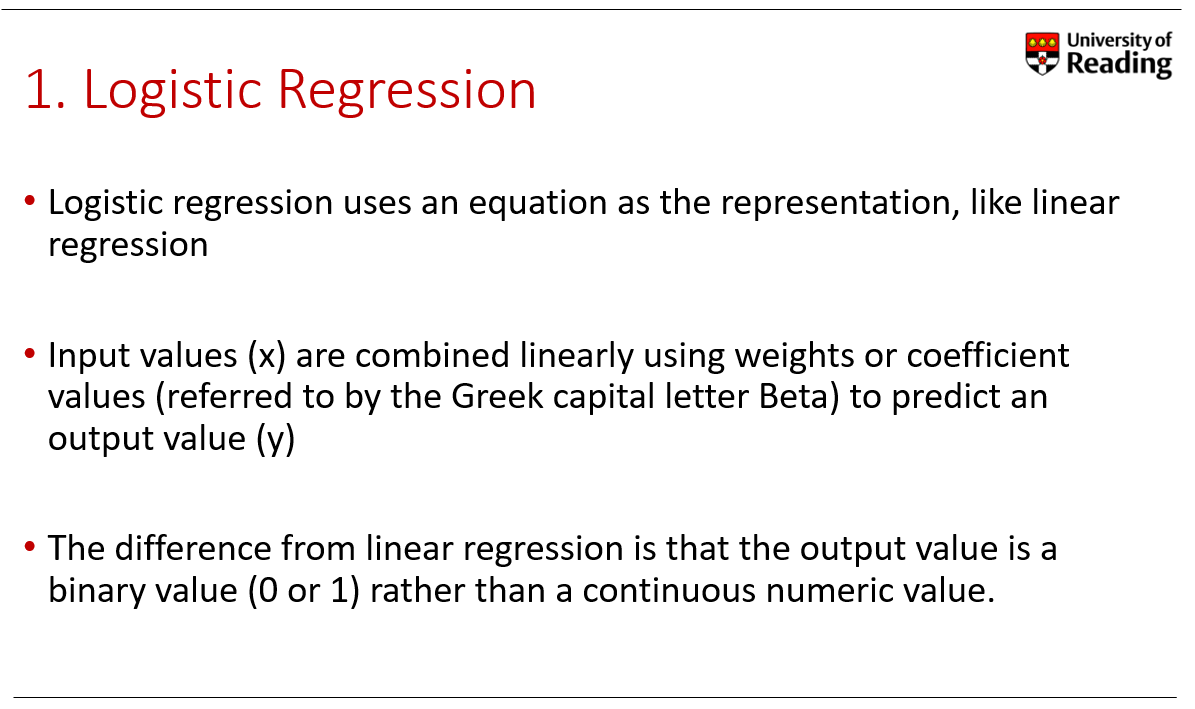

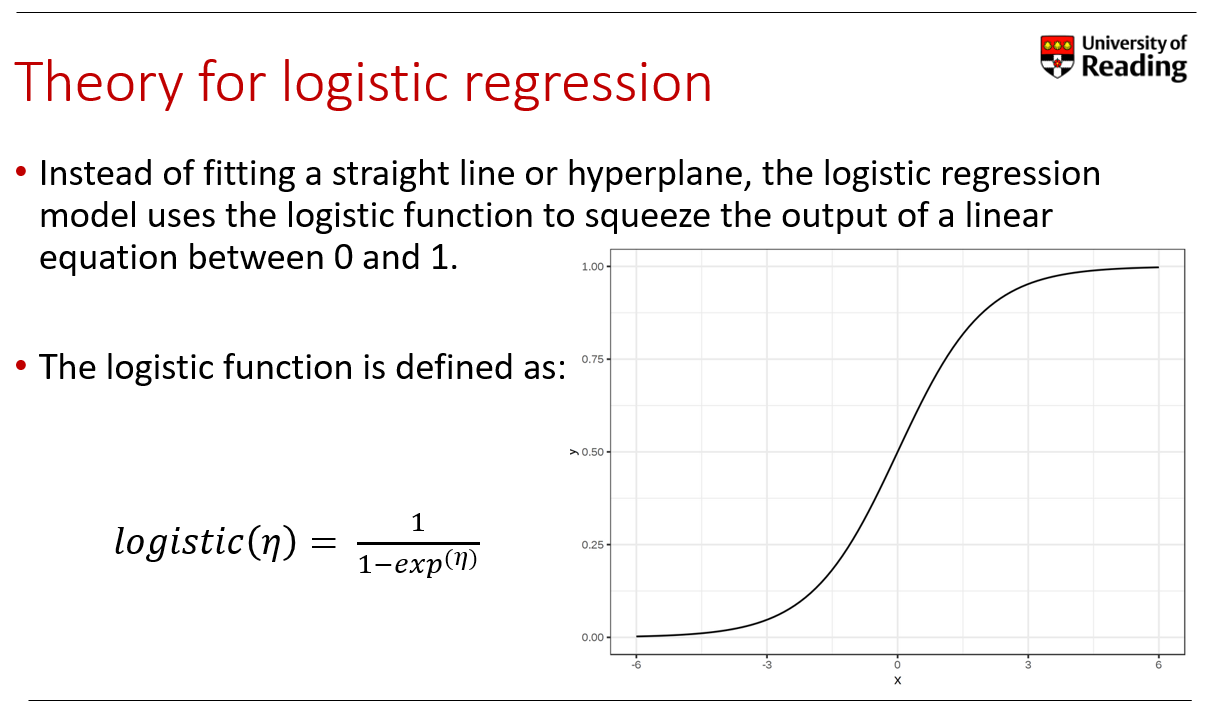

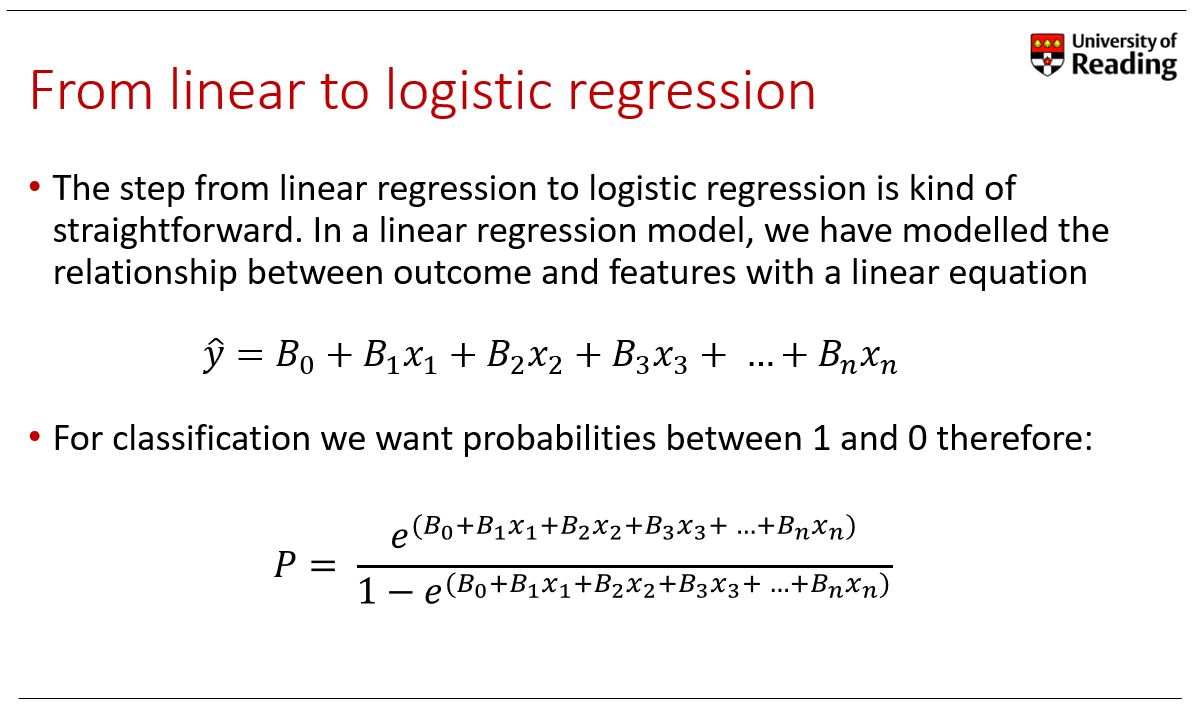

# Example of Logistic regression vs Linear Regression

In [1]:
#Import Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import linear_model

<ipython-input-2-e0946b30c143>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X > 0).astype(np.float)


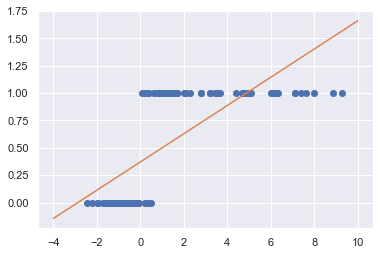

In [2]:
# Generate simulated data
np.random.seed(0)
X = np.random.normal(size=100)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=100)
X = X[:, np.newaxis]
plt.plot(X, y, 'o')

# Fit a linear regression to it using scikit learn
ols = linear_model.LinearRegression()
ols.fit(X, y)
X_test = np.linspace(-4, 10, 100)[:, np.newaxis]
plt.plot(X_test, ols.predict(X_test))

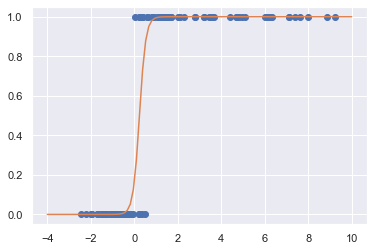

In [3]:
# Plot a logistic regression
plt.plot(X, y, 'o')
log_reg = linear_model.LogisticRegression(C=1e5)
log_reg.fit(X, y)
plt.plot(X_test, log_reg.predict_proba(X_test)[:, 1])
plt.show()

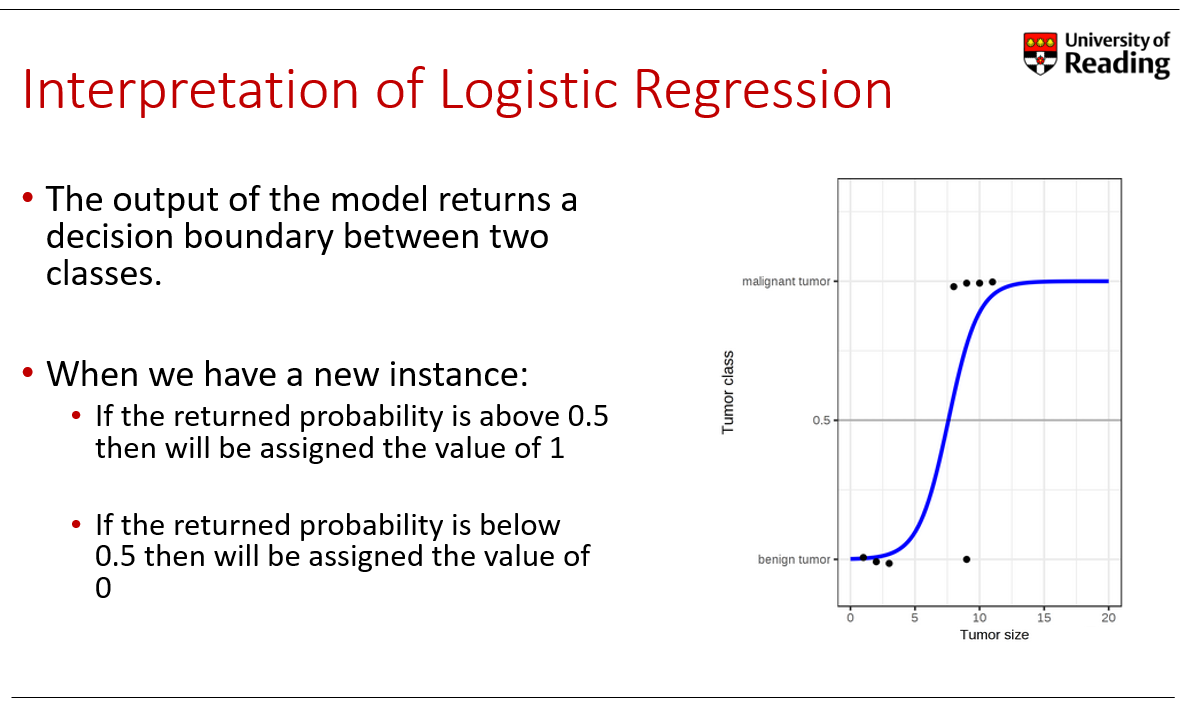

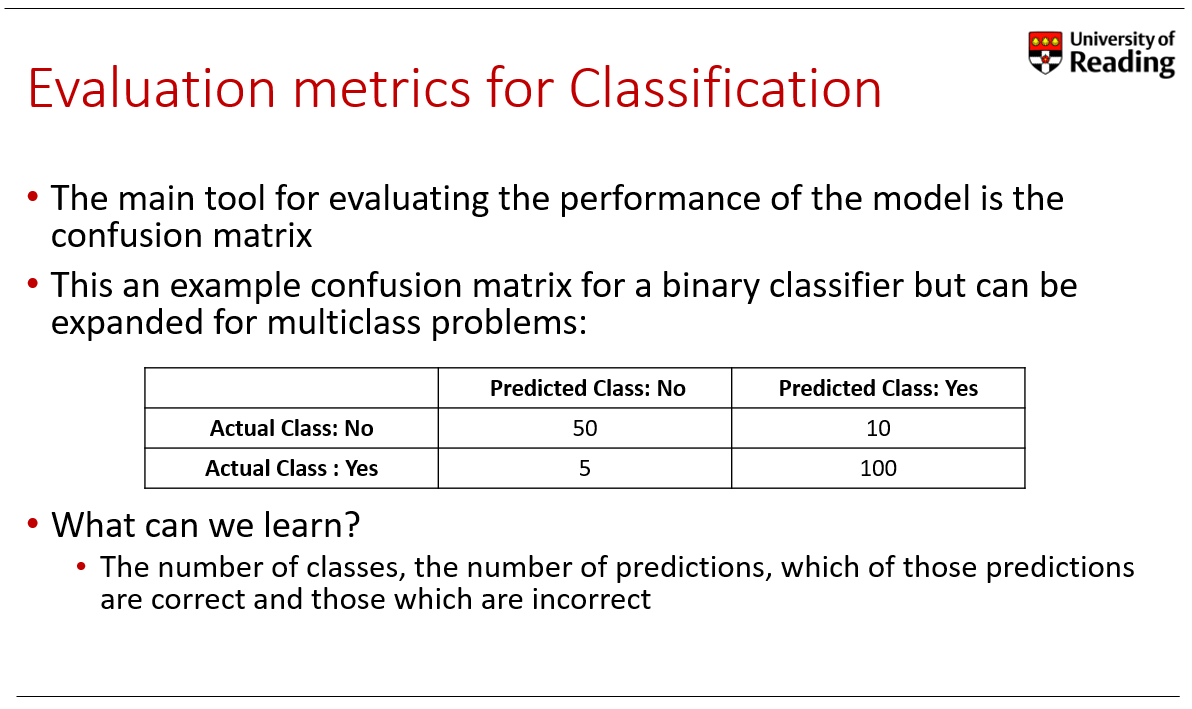

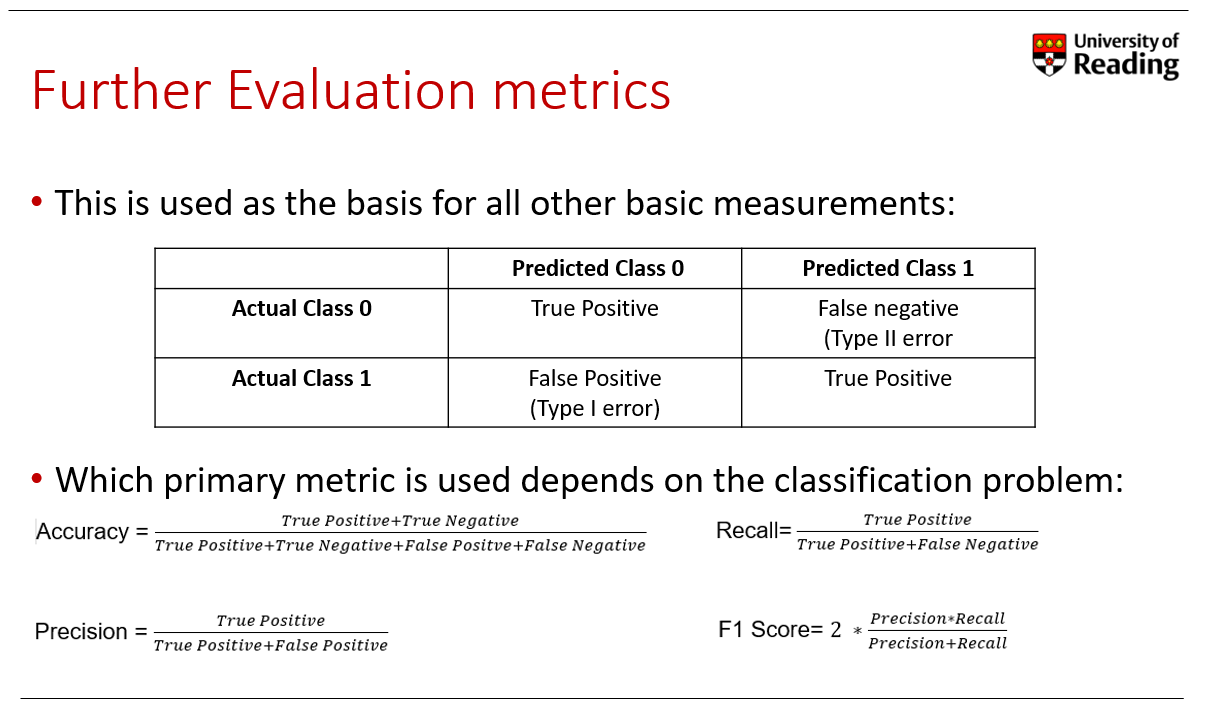

# An example of logistic regression and evaluation using the Wisconsin Breast Cancer dataset

In [4]:
# Import packages and data
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

cancer = datasets.load_breast_cancer()

In [5]:
#Split the dependent from the independent variables
X = cancer.data
y = cancer.target

print (X.shape)
print (y.shape)

(569, 30)
(569,)


In [6]:
#Split into traing/test holdout dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
clf2 = linear_model.LogisticRegression(max_iter = 10000)
clf2.fit(X_train, y_train)
clf2.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<module 'matplotlib.pyplot' from 'C:\\Users\\Miguel\\anaconda3\\envs\\base2\\lib\\site-packages\\matplotlib\\pyplot.py'>

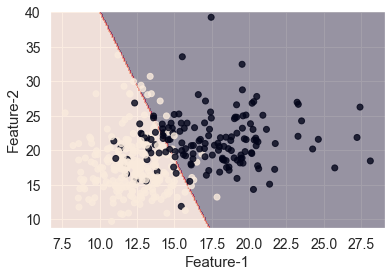

In [8]:
from decision_boundaries import plot_decision_boundaries
plot_decision_boundaries(X_train,y_train, LogisticRegression)

In [9]:
y_pred = clf2.predict(X_test)

In [10]:
#Plot the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 61,   2],
       [  2, 106]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Now we can make a prediction on a new instance as we have evaluated the model

In [12]:
X_new = [[ 17.99,  10.38,  122.8,  1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399,
          0.4904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]

print ('The probability of belonging to each class is:',clf2.predict_proba(X_new))
print('The most likely class is:',clf2.predict(X_new))

The probability of belonging to each class is: [[1.00000000e+00 1.16345447e-13]]
The most likely class is: [0]


This means that the model estimates that the sample in X_new has:

    100% likelihood to belong to the ‘Malignant’ class (target = 0)
    0.% likelihood to belong to the ‘Benign’ class (target = 1)


Be careful, though: what we've done here is not a very good model evaluation scheme. Cross validation is a methodology that removes the problem of sampling bias in model building introduced in earlier lectures. Cross Validation treats model evaluation a little bit more carefully.

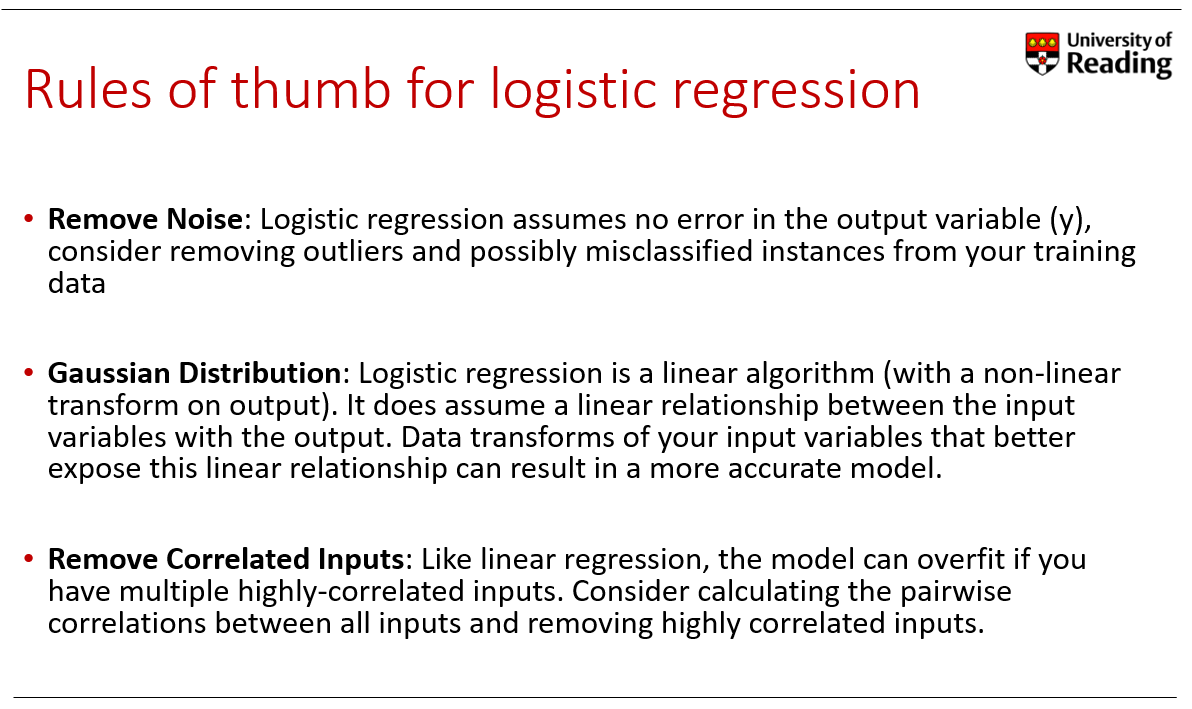

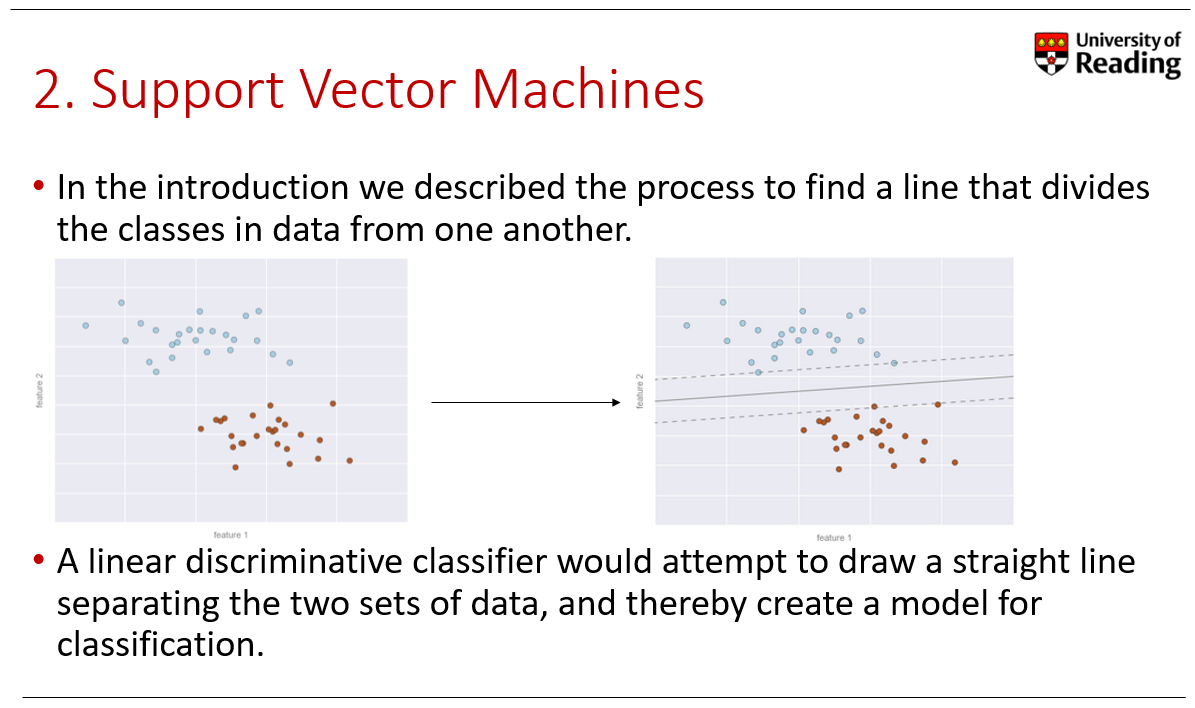

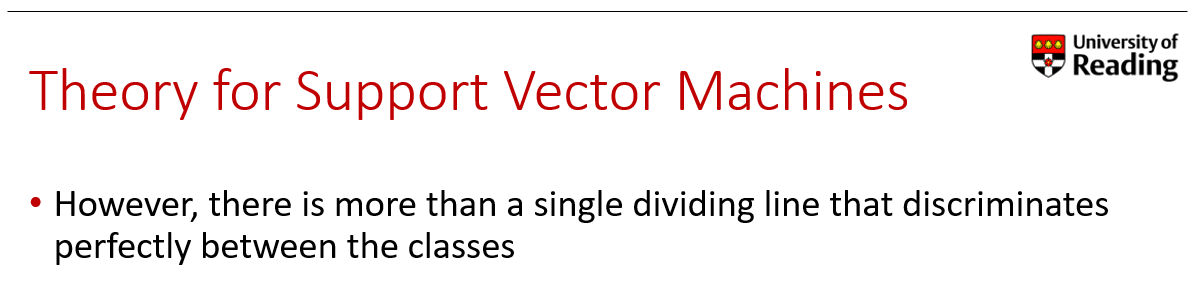

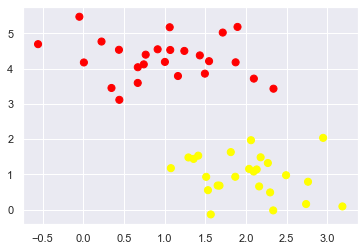

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

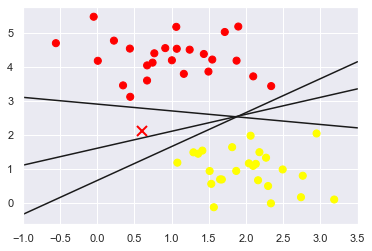

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Depending on which model is chosen, a new data point (e.g., the one marked by the "X" in this plot) will be assigned to a different class. The simple intuition of "drawing a line between classes" is not enough

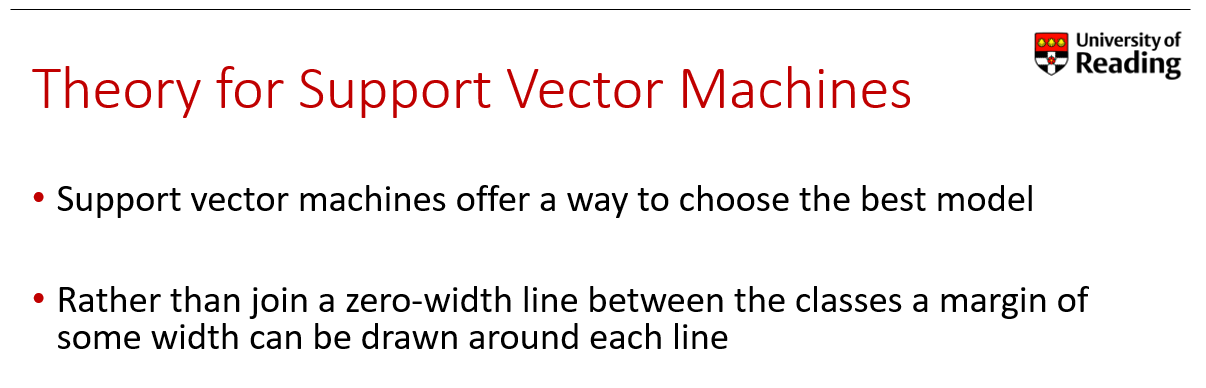

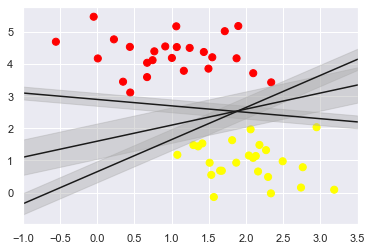

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);



In [16]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

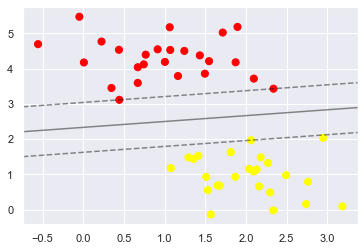

In [17]:
#from decision_boundaries import plot_svc_decision_function
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

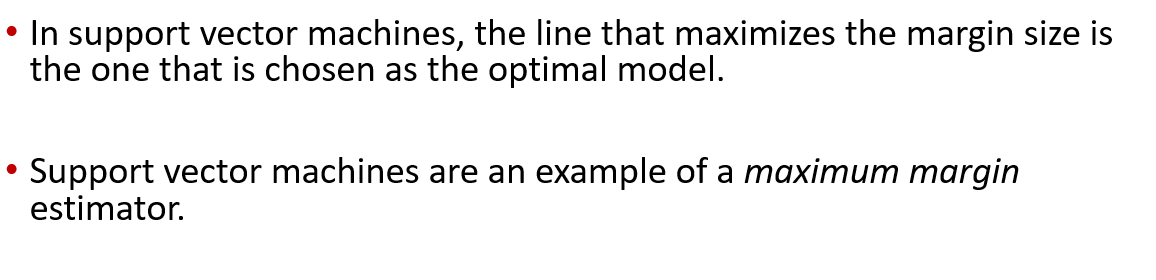

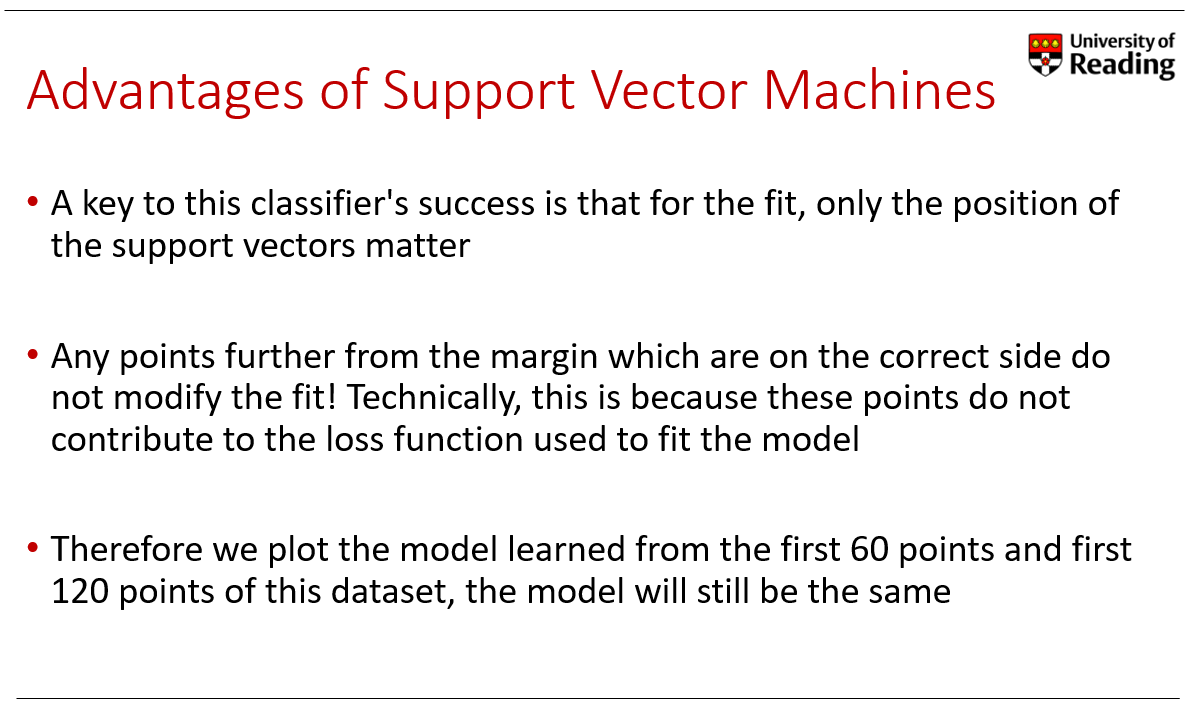

In [18]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

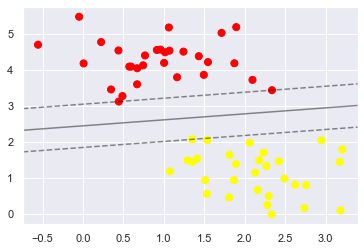

In [19]:
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

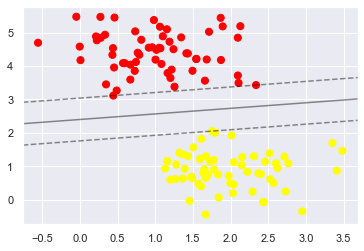

In [20]:
X, y = make_blobs(n_samples=120, centers=2, random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# Example of support vector machine classification using the Wiconsin Breast Cancer dataset

In [21]:
from sklearn.svm import SVC # "Support vector classifier"

X = cancer.data
y = cancer.target

print (X.shape)
print (y.shape)

(569, 30)
(569,)


In [22]:
#Split into traing/test holdout dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

<module 'matplotlib.pyplot' from 'C:\\Users\\Miguel\\anaconda3\\envs\\base2\\lib\\site-packages\\matplotlib\\pyplot.py'>

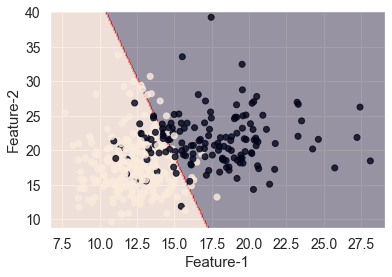

In [24]:
plot_decision_boundaries(X_train,y_train, SVC, kernel='linear')

In [25]:
y_pred = model.predict(X_test)

In [26]:
#Plot the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 59,   4],
       [  2, 106]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [28]:
X_new = [[ 17.99,  10.38,  122.8,  1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399,
          0.4904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]

print('The predicted class is:',model.predict(X_new))

The predicted class is: [0]


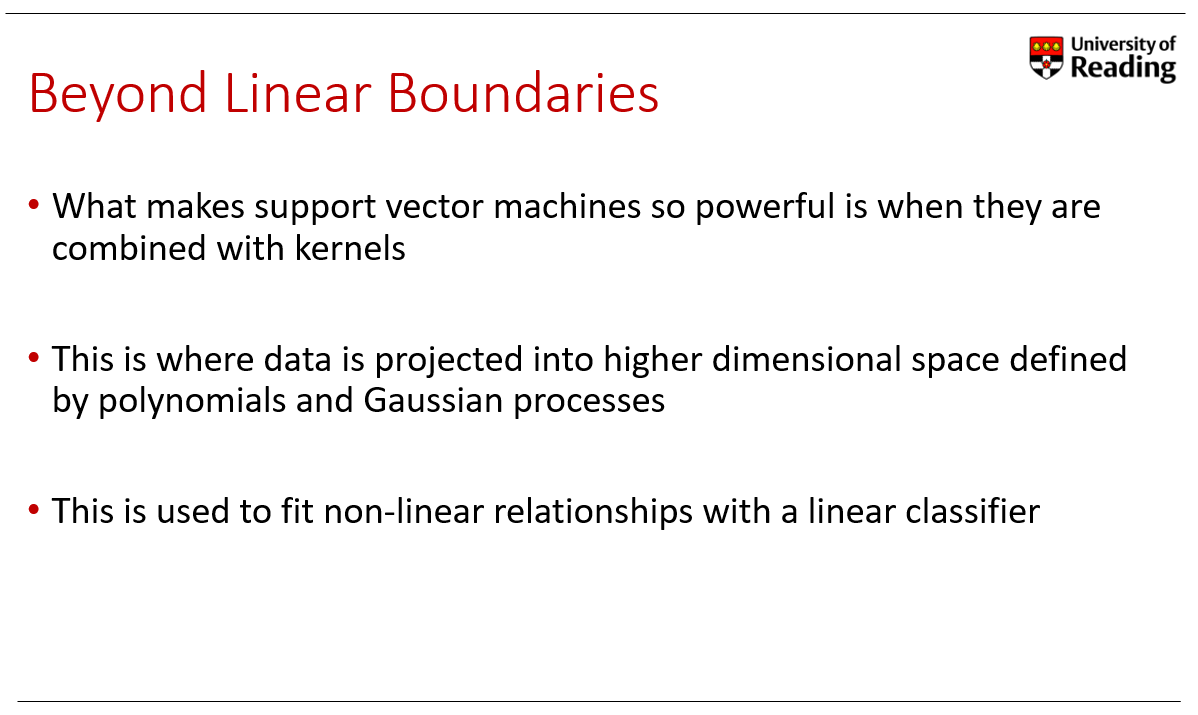

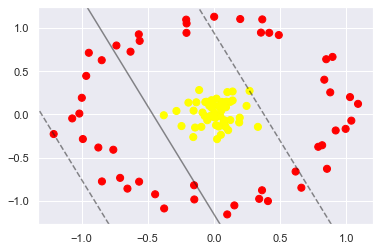

In [29]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

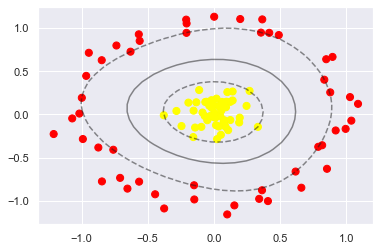

In [30]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

<module 'matplotlib.pyplot' from 'C:\\Users\\Miguel\\anaconda3\\envs\\base2\\lib\\site-packages\\matplotlib\\pyplot.py'>

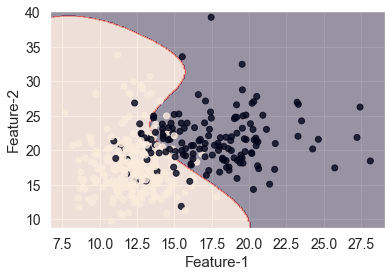

In [31]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
plot_decision_boundaries(X_train,y_train, SVC, kernel='rbf')

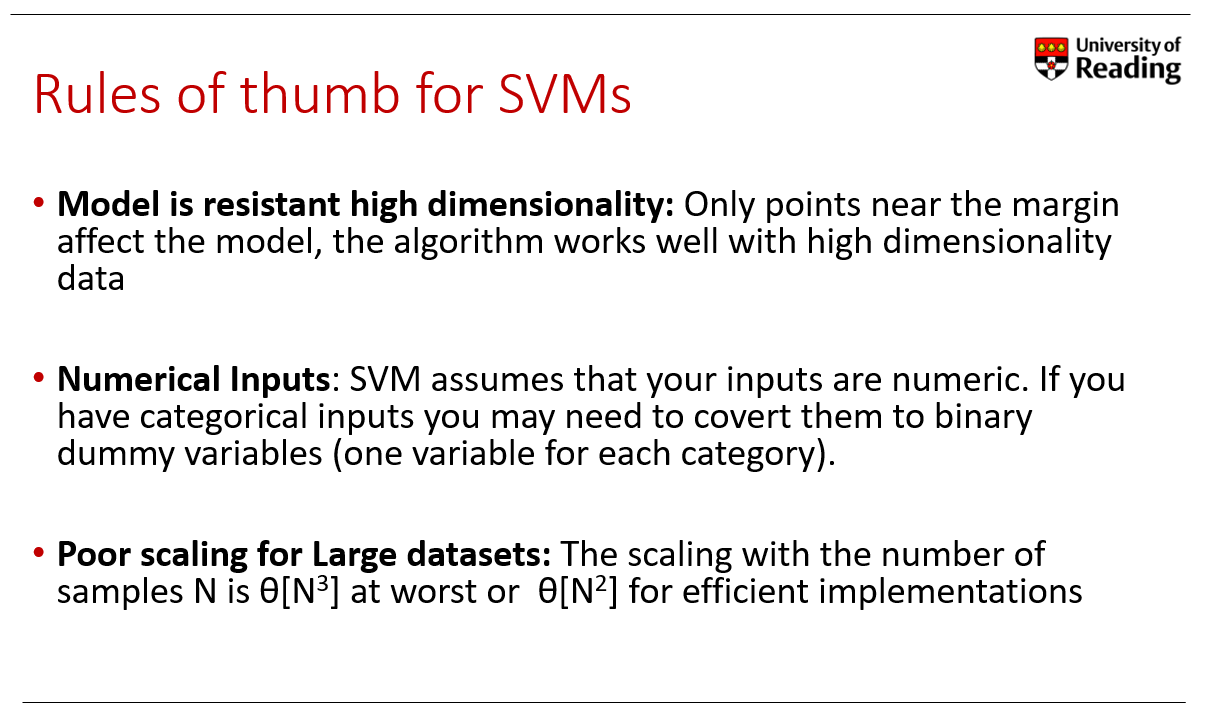

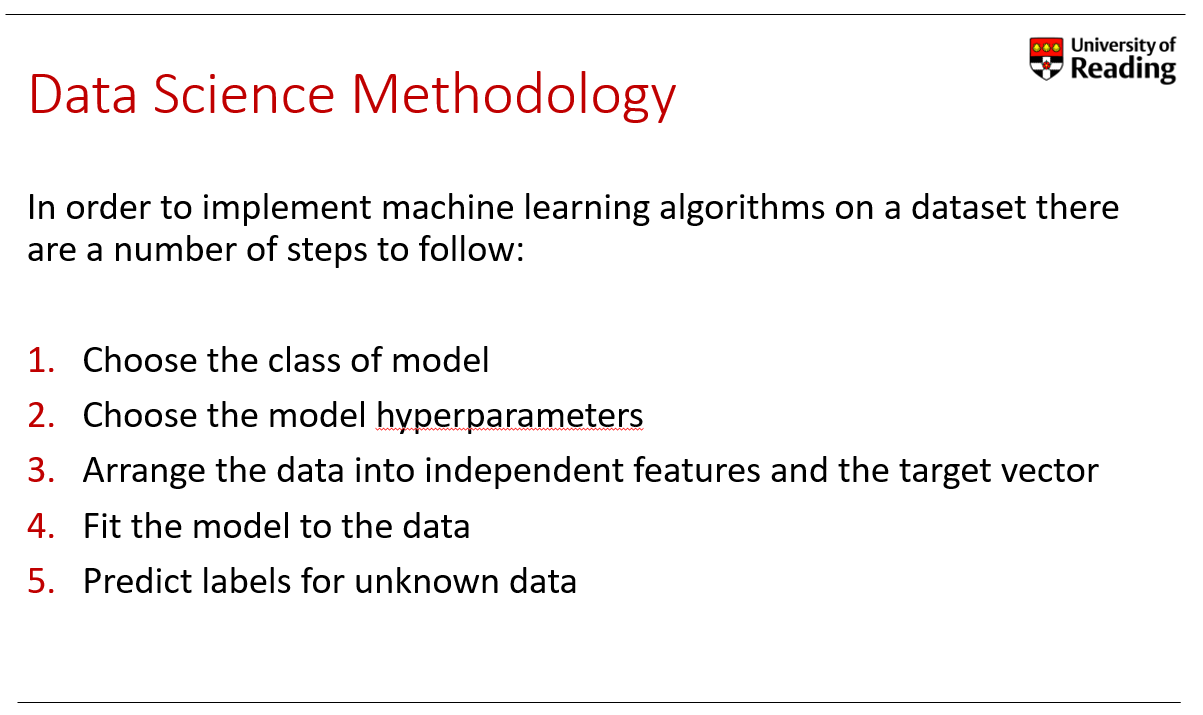

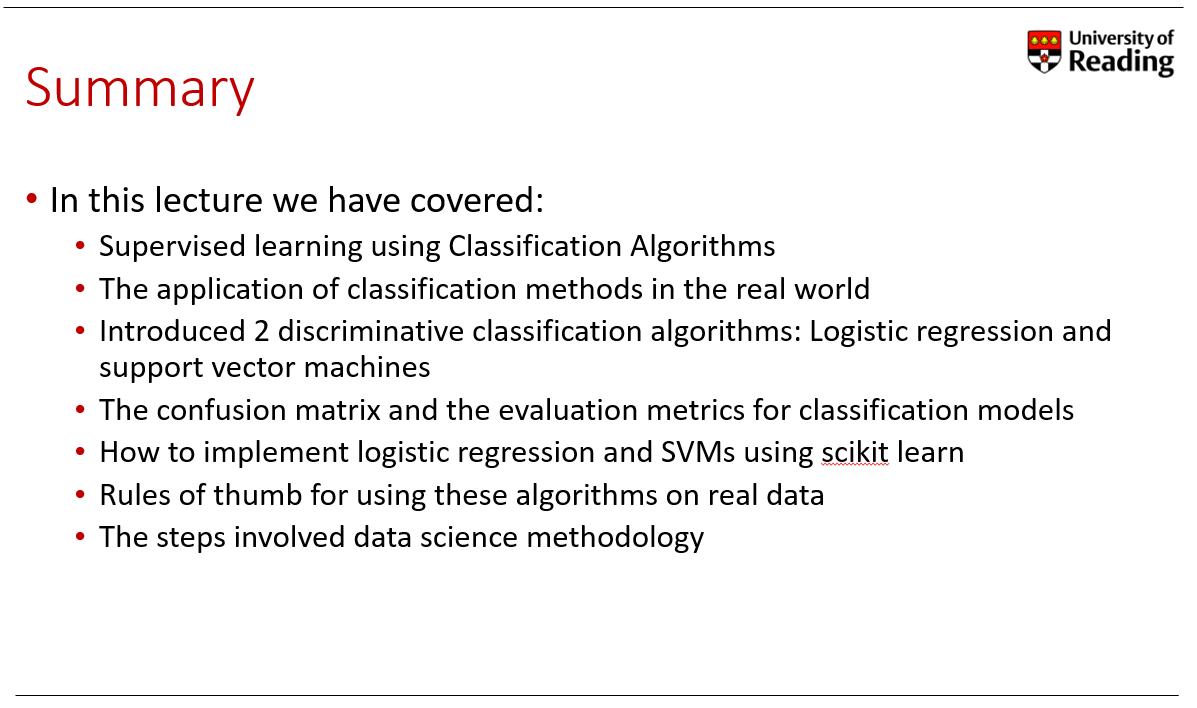